# 모듈 임포팅

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

In [3]:
import time

# Keras DNN 최소 코드


# 데이터 준비

1차원 데이터 x와 x**2의 1차원 데이타 y

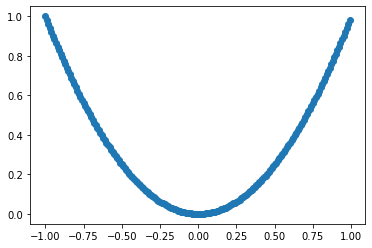

In [4]:
import numpy as np

x = np.arange(-1,1,0.01)
y = x**2

plt.scatter(x,y)

In [5]:
print(len(x))
print(x.shape)


200
(200,)


## 최소 코드

아래의 코드는 최소 코드.

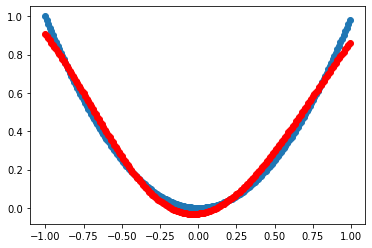

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


# 모델 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 컴파일 : 모델 + optimizer + loss
model.compile(optimizer="SGD", loss="mse")


# 학습
model.fit(x, y, epochs=1000, verbose=0, batch_size=20)


# 예측
y_ = model.predict(x)


# 결과 그래프로 보기
plt.scatter(x,y) # 정답
plt.scatter(x,y_,color='r') # 결과
plt.show()

# Keras DNN 최소 코드에 기본 정도만 추가

최소는 아니고, 이정도는 매번 사용하는 코드

## model.evaluate() - 성능 평가하기

7/7 [==============================] - 0s 3ms/step - loss: 0.0018 - mape: 0.0348
loss= 0.001755235018208623
mape= 0.03477006405591965


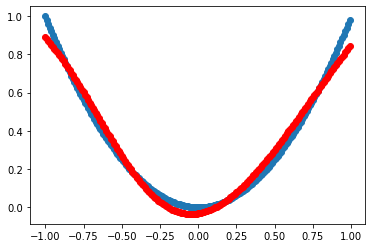

In [7]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense


model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh' ))
model.add(Dense(1))


#model.compile(optimizer="SGD", loss="mse")
model.compile(optimizer="SGD", loss="mse", metrics=["mape"])


model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

loss, mape = model.evaluate(x, y) # ADD
print("loss=", loss) # ADD
print("mape=", mape) # ADD


y_ = model.predict(x)


plt.scatter(x,y)
plt.scatter(x,y_,color='r')
plt.show()

출력에 loss와 mae가 추가되었다.

## 테스트셋으로 평가하기

데이터를 train과 test으로 나누어 준비한다.

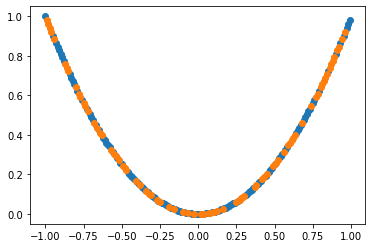

In [8]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y)
plt.show()

3/3 [==============================] - 0s 5ms/step - loss: 0.0013 - mape: 0.0302
loss= 0.0013355811825022101
mape= 0.030154535546898842


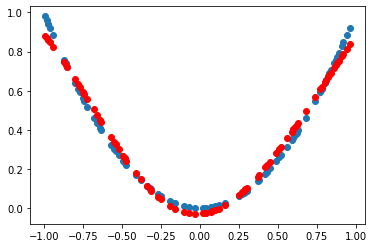

In [9]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])


# model.fit(x, y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)


# loss, mape = model.evaluate(x, y)
loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)


# y_ = model.predict(x)
y_ = model.predict(test_x)

# plt.scatter(x,y)
plt.scatter(test_x,test_y)
# plt.scatter(x,y_,color='r')
plt.scatter(test_x,y_,color='r')
plt.show()

train_x, train_y로 학습하였고,
evaluate()와 predict()에는 test_x, test_y를 사용하였다.

그려진 그림을 보면 test_x의 점사이에 빈 간격이 보인다. 그 간격이 train_x에 해당한다.

## Base Model 결과 저장

이후 비교를 위해 그래프를 저장해 둔다.


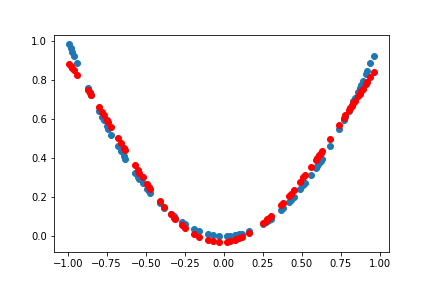

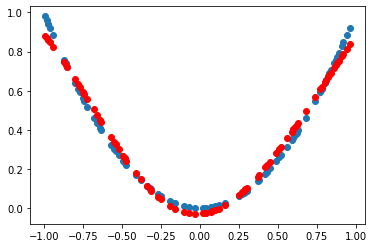

In [10]:
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.savefig("base_result.png")

from IPython.display import Image
display(Image("base_result.png"))

## 학습 시간을 출력

elapsed : 11.785048961639404
3/3 [==============================] - 0s 5ms/step - loss: 0.0015 - mape: 0.0317
loss= 0.0015335240168496966
mape= 0.031701892614364624


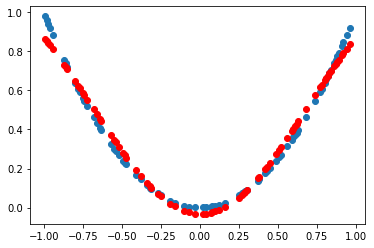

In [11]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])

start_time = time.time() # ADD
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) # ADD 
    

loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

elapsed로 경과된 시간이 초 단위로 보인다.

## model.summary() 네트웤 모양 보기

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 11.307572603225708


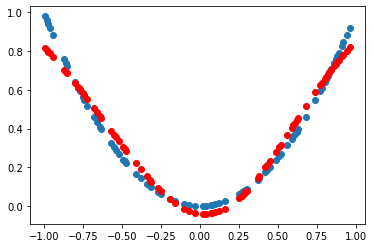

In [12]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary() # ADD

start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

네트웤의 모양이 보인다.

노드 10개, 10개를 갖는 은닉층 2개가 있다.


모든 레이어는 activation(w\*x+b) 의 형태로, 

첫 번 째 은닉층은 20개( = ((1+1)\*10) = (입력수+1)\*10)의 웨이트를, 

두 번 째 은닉층은 110개( = ( (10+1)\*10) )의 웨이트가 있다.. 


# Keras DNN Template

본 실습에 사용되는 코든 코드의 템플릿.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 20.784827709197998
3/3 [==============================] - 0s 5ms/step - loss: 0.0020 - mape: 0.0368
loss= 0.001982353627681732
mape= 0.03682452440261841


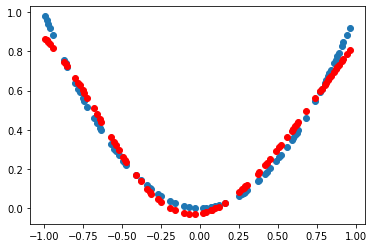

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


# 모델 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()


# 학습
start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


# 평가
loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)


# 예측
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# layer 수

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

## 히든 레이어를 1개 만

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.532804727554321
3/3 [==============================] - 0s 7ms/step - loss: 0.0023 - mape: 0.0390
loss= 0.0022730459459125996
mape= 0.03899121657013893


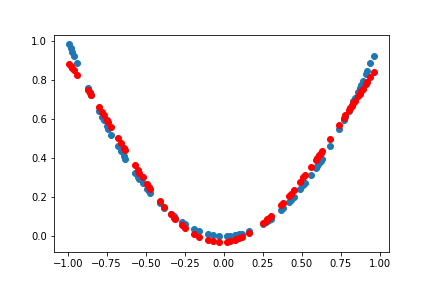

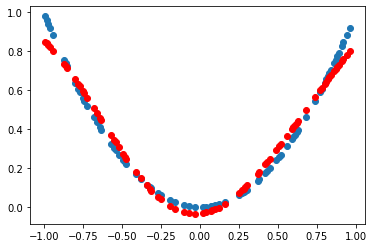

In [15]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)


# base 모델의 결과
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 히든레이어 없을 때

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.494503498077393
3/3 [==============================] - 0s 4ms/step - loss: 0.1008 - mape: 0.2643
loss= 0.1008385419845581
mape= 0.2643142640590668


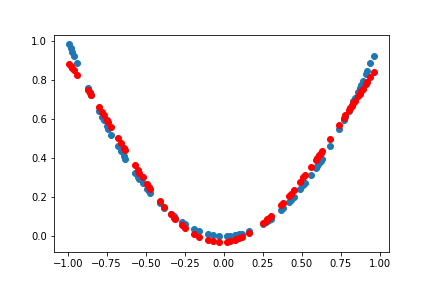

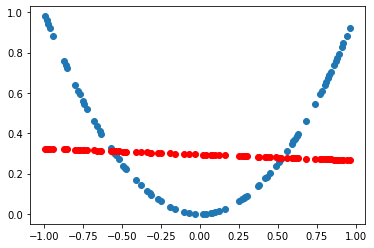

In [16]:
from tensorflow.keras.layers import Input

model = keras.Sequential()
model.add(Input(1))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)


# base 모델의 결과
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

히든 레이어가 없을 경우 학습되지 않는다.

## 히든 레이어를 3개로

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
elapsed : 20.82318377494812
3/3 [==============================] - 0s 6ms/step - loss: 0.0014 - mape: 0.0302
loss= 0.0014402440283447504
mape= 0.03017229214310646


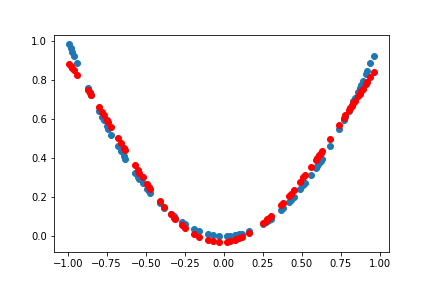

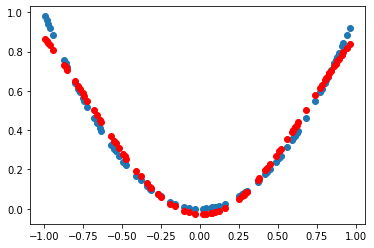

In [17]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

3개로 증가해도 별 차이 없다.

## 히든 레이어를 5개로

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
________________________________________________________

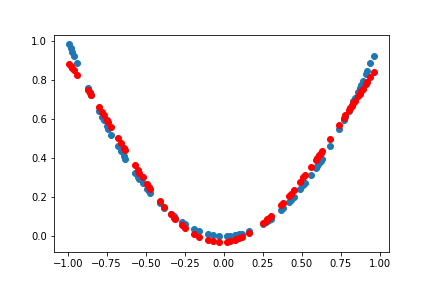

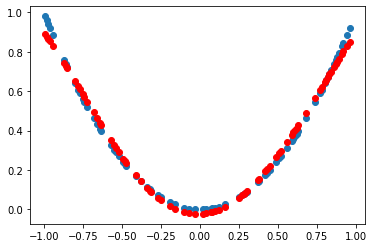

In [18]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

5개로 증가했을 때 살짝 좋은 듯 하다.

## 히든 레이어를 10개로

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_32 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_33 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_34 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_36 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_37 (Dense)             (None, 10)              

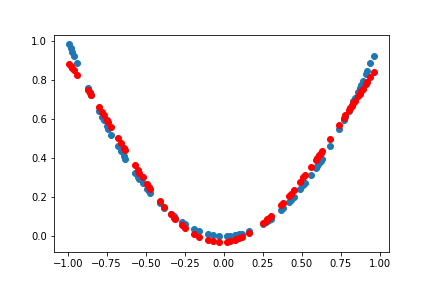

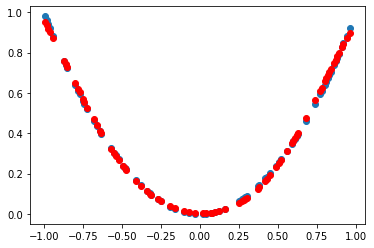

In [19]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

10개로 했을 때 좋아진 차이가 보인다.

# node 수

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

## node 수를 작게

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 5)                 10        
_________________________________________________________________
dense_43 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 6         
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________
elapsed : 11.298734903335571
3/3 [==============================] - 0s 10ms/step - loss: 0.0021 - mape: 0.0379
loss= 0.002105525229126215
mape= 0.03786376863718033


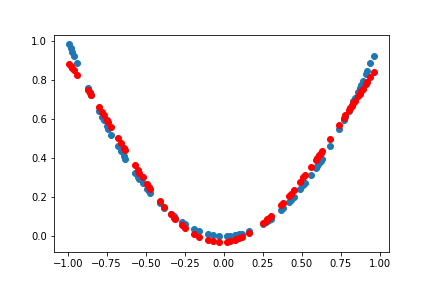

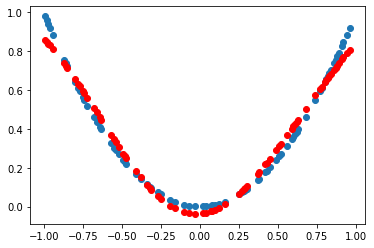

In [21]:
model = keras.Sequential()
model.add(Input(1))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(5, activation='tanh', input_shape=(1,)))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

5개 노드의 경우 살짝 차이가 난다.

## 노드 수를 아주 작게

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_46 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
elapsed : 11.119620084762573
3/3 [==============================] - 0s 5ms/step - loss: 0.0245 - mape: 0.1252
loss= 0.024454424157738686
mape= 0.1252451241016388


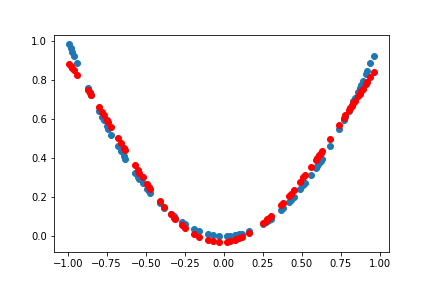

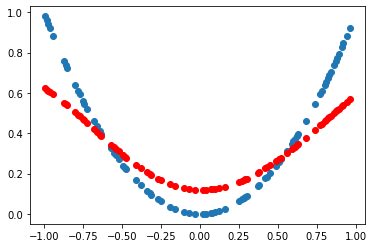

In [22]:
model = keras.Sequential()
model.add(Input(1))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(2, activation='tanh', input_shape=(1,)))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

2개의 경우 차이가 커 보인다.

## 노드 수가 1개

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
elapsed : 11.373988151550293
3/3 [==============================] - 0s 5ms/step - loss: 0.1005 - mape: 0.2640
loss= 0.10053785890340805
mape= 0.264014333486557


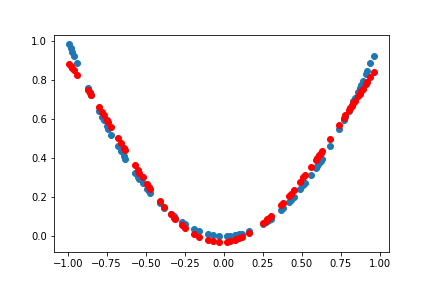

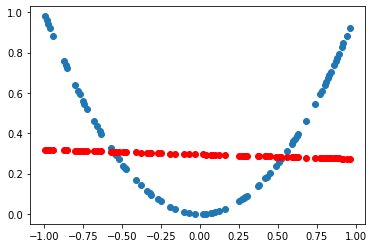

In [23]:
model = keras.Sequential()
model.add(Input(1))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

1개의 경우 거의 학습이 되지 않는다.

# sin 데이터

In [24]:
def get_sin_data(start=0, end=10, step=0.1):
  x = np.arange(start,end,step)
  np.random.shuffle(x)
  y = np.sin(x)

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)

# 학습 추가 진행

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

모델은 그대로 두고 데이터만 sin 데이터로 변경한다.

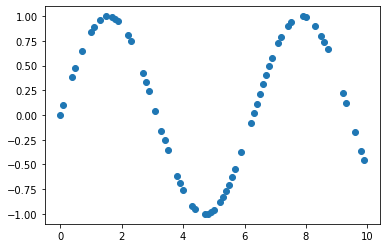

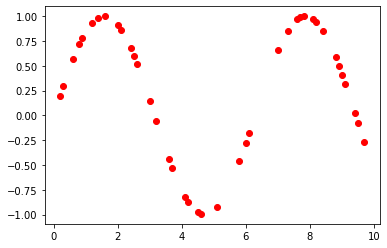

In [26]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

plt.scatter(train_x,train_y)
plt.show()

plt.scatter(test_x,test_y,color="r")
plt.show()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_52 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.56916880607605
2/2 [==============================] - 0s 10ms/step - loss: 0.1305 - mape: 0.2616
loss= 0.13051564991474152
mape= 0.261640340089798


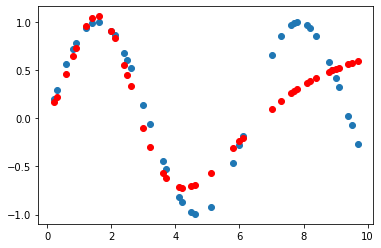

In [27]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

학습이 충분히 되지 않은 듯 하다.

## 추가 학습

In [28]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=20):

  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size)
  print("elapsed : {}".format(time.time() - start_time))    

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

def fit_n_times(model, train_x, train_y, test_x, test_y, n):
  
  for i in range(n):
    print("{} times fitting".format(i))
    fit_one_more(model, train_x, train_y, test_x, test_y)


0 times fitting
elapsed : 6.835861444473267


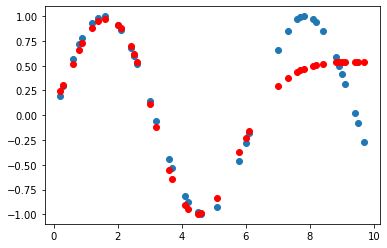

1 times fitting
elapsed : 6.754800319671631


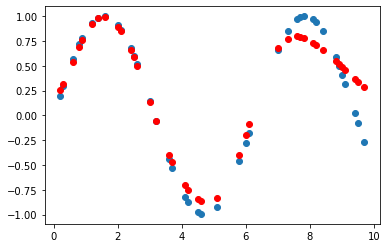

2 times fitting
elapsed : 6.691863298416138


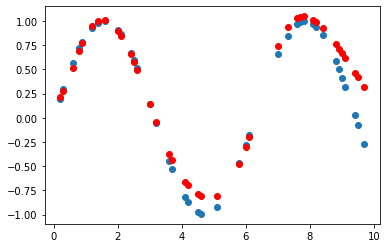

3 times fitting
elapsed : 10.268079042434692


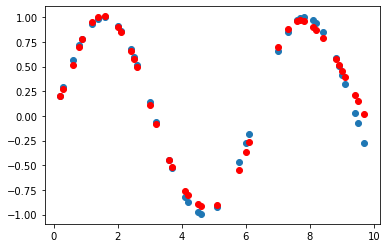

4 times fitting
elapsed : 7.113433837890625


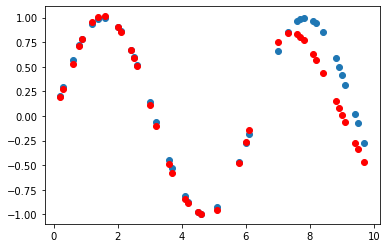

5 times fitting
elapsed : 7.115121364593506


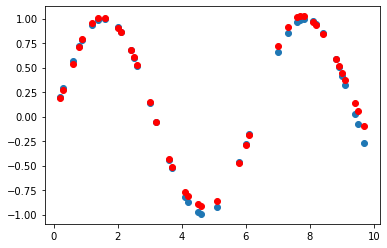

6 times fitting
elapsed : 7.060767889022827


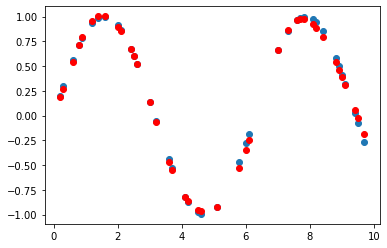

7 times fitting
elapsed : 10.277539491653442


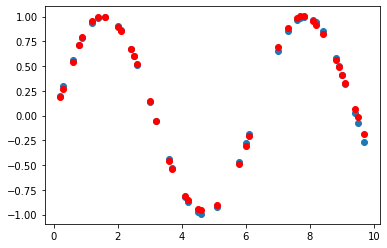

8 times fitting
elapsed : 6.942679166793823


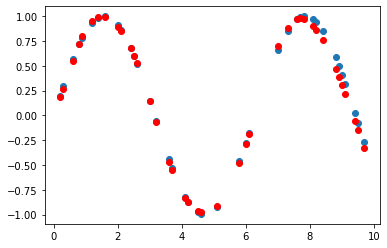

9 times fitting
elapsed : 7.015764474868774


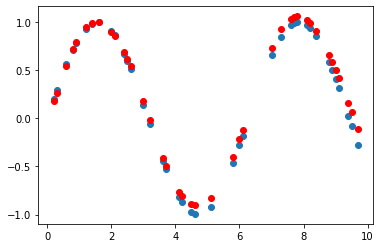

In [29]:
fit_n_times(model, train_x, train_y, test_x, test_y, 10)

학습이 더 진행되면서 거의 완벽하게 학습된 것을 볼 수 있다.

# model.fit()의 batch_size

batch_size는 GPU와 관련된 옵션이다.

한번에 GPU에 보내는 데이터의 수이다.  

<br>

batch_size가 1일 경우 1개를 보내고, 1개의 결과를 받고, 1번 웨이트를 업데이트 한다.

batch_size가 10일 경우 10개를 보내고, 10개의 결과를 한 번에 받고, 1번 웨이트를 업데이트 한다.

<br>

GPU는 보통 수천개의 코어를 가지고 있다. 동시에 꽤 많은 연산을 처리할 수 있다. 그런데 데이터가 적으면 대부분은 사용하지 못하고 일부만 연산에 사용된다. 

복수의 데이터를 한번에 보내어 한번에 연산을 할수 있고, 그 결과를 반환할 수 있다. 이런 방법으로 연산 시간을 줄일 수 있다.

<br>

하지만, 복수의 데이터를 한번에 보내는 경우 한번에 보낸 결과가 한번에 오고 1번 업데이트 되면서 업데이트 되는 사항이 뭉개지는 단점이 있다.


In [30]:
def build_model():

  model = keras.Sequential()
  model.add(Input(1))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))

  model.compile(optimizer="SGD", loss="mse", metrics=["mape"])

  return model

def fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes):

  for batch_size in batch_sizes:
    model = build_model()
    print("batch_size={}".format(batch_size))
    fit_one_more(model, train_x, train_y, test_x, test_y, batch_size)

In [31]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

## batch_size 적용 : [1,2,5,10,20,50,100,200,500]

batch_size=1
elapsed : 92.47760701179504


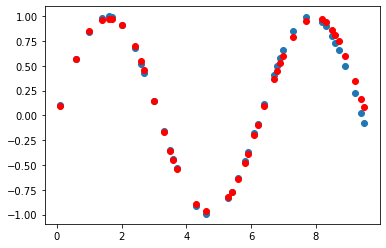

batch_size=2
elapsed : 48.43814206123352


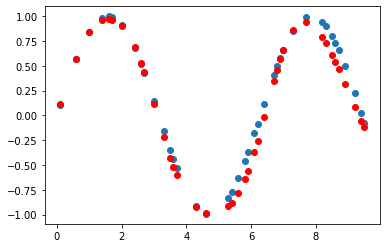

batch_size=5
elapsed : 41.29614043235779


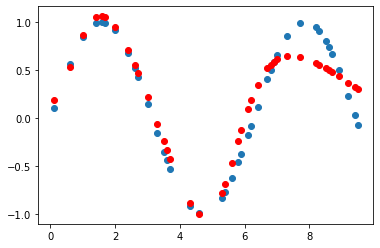

batch_size=10
elapsed : 11.949291467666626


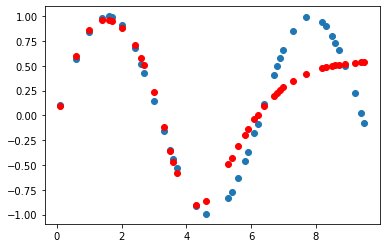

batch_size=20
elapsed : 7.585794448852539


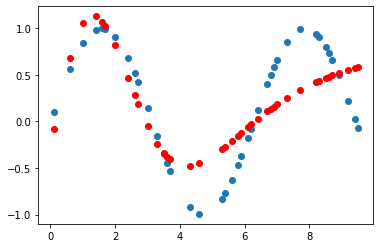

batch_size=50
elapsed : 10.624692440032959


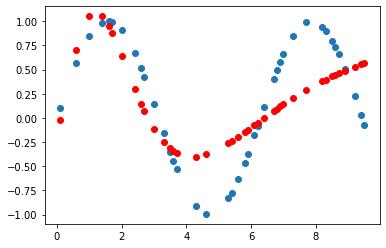

batch_size=100
elapsed : 5.322119951248169


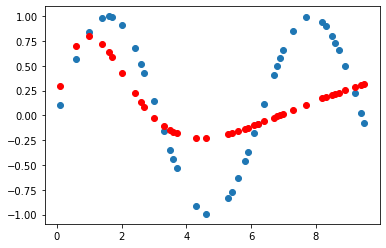

batch_size=200
elapsed : 5.190504550933838


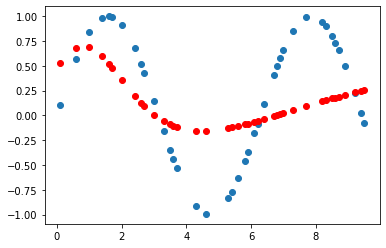

batch_size=500
elapsed : 5.493990659713745


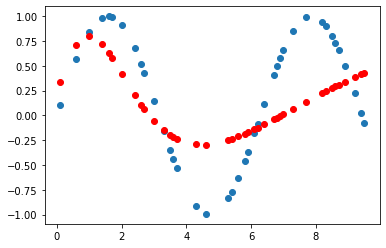

In [32]:
fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes=[1,2,5,10,20,50,100,200,500])

맨 앞의 결과가 batch_size 1인 경우이다. 100개의 데이터를 매번 1개 씩 보냈고, 매번 업데이트 했다. 

batch_size를 키우면, 시간은 줄어들지만 학습이 빠르게 진행되지 않는다.

# model.fit() verbose

- 0 : 진행하면서 아무런 출력 없이
- 1 : 진행하면서 출력과 같이


In [35]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

print(train_x.shape)

start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_85 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
(60000,)
Epoch 1/5
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2809 - mape: 0.4458
Epoch 2/5
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1454 - mape: 0.2835
Epoch 3/5
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1030 - mape: 0.2084
Epoch 4/5
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0669 - m

# loss 보기


In [33]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_82 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.568424224853516


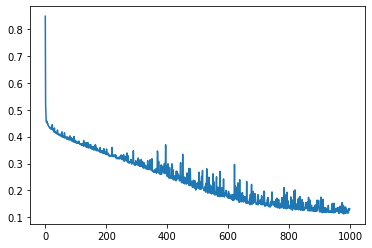

In [34]:
plt.plot(model.history.history['loss'])
plt.show()

# 학습 시에 validation

## model.fit()의 validation_data

In [36]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_data=(test_x, test_y))
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_88 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 26.419246196746826


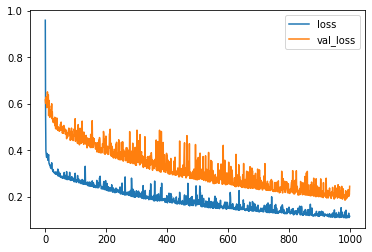

In [37]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()

## model.fit()의 validation_split

따로 validation 데이터를 주지 않고, test 데이터로 준 것의 일부를 validation에 사용.

validation에 사용된 데이터는 학습에 사용되지 않는다.


In [38]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_91 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 41.33417892456055


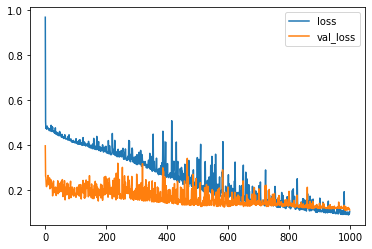

In [39]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()

# 데이터 크기와 epoch 수

In [40]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=5, verbose=2, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_94 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
3000/3000 - 5s - loss: 0.2541 - mape: 0.4216
Epoch 2/5
3000/3000 - 5s - loss: 0.1376 - mape: 0.2709
Epoch 3/5
3000/3000 - 4s - loss: 0.0654 - mape: 0.1519
Epoch 4/5
3000/3000 - 5s - loss: 0.0194 - mape: 0.0881
Epoch 5/5
3000/3000 - 5s - loss: 0.0191 - mape: 0.0826
elapsed : 23.1413471698761


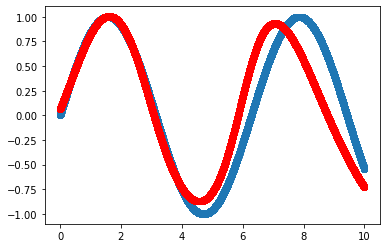

In [41]:
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()


train_x의 데이터 수가 6000개. epoch는 5. 총 30,000번 업데이트 되었다.


epoch가 적어도 데이터 수가 많으면 학습 잘된다.

# Shuffle


## 전체 데이터 준비 시에

60


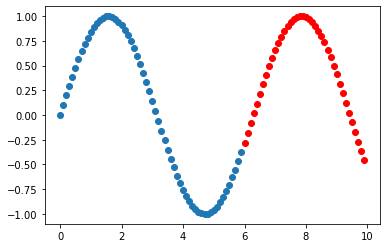

In [42]:
x = np.arange(0,10,0.1)
# np.random.shuffle(x) # COMMENTED
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_97 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


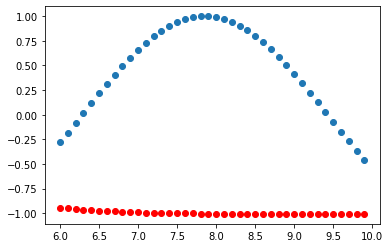

In [43]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

model.fit(train_x, train_y, epochs=2000, verbose=0, batch_size=20)

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

train 데이터와 test 데이터가 서로 떨어져 있다. 

train 영역의 데이터로 학습된 모델은 test 영역의 데이터에 적용하지 못한다.

전체데이터를 잘 섞어 주고, 이를 train, test로 나누어야 한다.

60


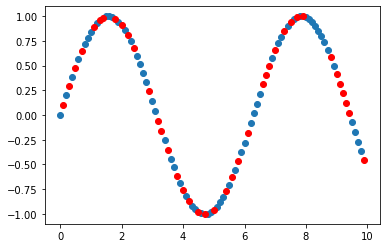

In [44]:
x = np.arange(0,10,0.1)
np.random.shuffle(x) # UNCOMMENT
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_100 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


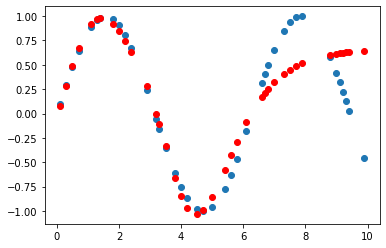

In [45]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

model.fit(train_x, train_y, epochs=2000, verbose=0, batch_size=20)

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 데이터 쌍 유지하면서 섞기

In [46]:
x = np.arange(0,10,0.1)
y = x

indexes = np.arange(len(x))
print(indexes)
np.random.shuffle(indexes)
print(indexes)

print(x[:10])
print(y[:10])

x = x[indexes]
y = y[indexes]

print(x[:10])
print(y[:10])


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 3 20 10 84 39 86 87 59 77 47 65 60 61 98 75 67 33 40 62 35 91 46 97 50
 29 74  5 69 95 85 88 36 52 63 66 89  2 28 34 31 42 11 13 16 76 57  1 37
  9 19  0 79 81 56 82 94 17 64  7 90 92 70 96 58 53 44 15 24 72 23  8 32
 14 22 26 21 68 38 55 43 49 99 71 80 25 45  6 73 12 27 83 51 41 93 30 48
 18 54  4 78]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.3 2.  1.  8.4 3.9 8.6 8.7 5.9 7.7 4.7]
[0.3 2.  1.  8.4 3.9 8.6 8.7 5.9 7.7 4.7]


## 학습 진행 시에

학습 시에 데이터를 섞어 주지 않으면 특정 데이터 순서로 학습이 일어나 편향이 생길 수있다.

In [47]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_103 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.907758951187134


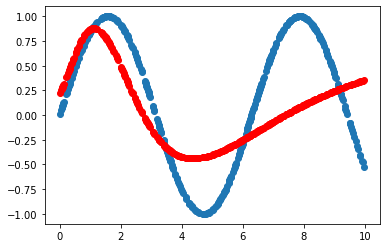

In [48]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

start_time = time.time()
model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_106 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.8362624645233154


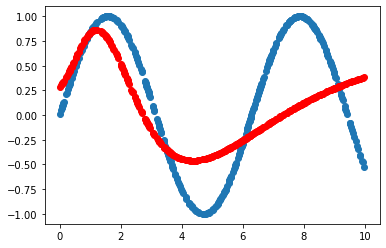

In [49]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

start_time = time.time()
# model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20, shuffle=True)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

각 epoch마다 섞어 주는 거싱 중요하다.

shuffle 파라매터의 디펄트 값은 True로, Keras의 model.fit() 호출시에는 따로 설정하지 않아도 된다.

# 모델 저장과 로딩

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_109 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_110 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.559650659561157
2/2 [==============================] - 0s 10ms/step - loss: 0.1852 - mape: 0.3256
loss= 0.18523931503295898
mape= 0.3255940079689026


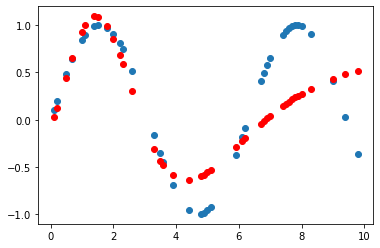

In [50]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 모델 저장

In [51]:
model.save('my_model.h5')

!ls -al

total 52
drwxr-xr-x 1 root root  4096 Sep  9 07:10 .
drwxr-xr-x 1 root root  4096 Sep  9 06:47 ..
-rw-r--r-- 1 root root 12545 Sep  9 06:59 base_result.png
drwxr-xr-x 4 root root  4096 Sep  1 19:26 .config
-rw-r--r-- 1 root root 19808 Sep  9 07:10 my_model.h5
drwxr-xr-x 1 root root  4096 Sep  1 19:26 sample_data


모델 로딩

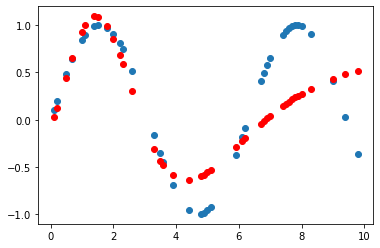

In [52]:
new_model = keras.models.load_model('my_model.h5')

y_ = new_model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# GPU 사용

따로 명시하지 않아도 default로 GPU를 사용한다.

명시적으로 설정할 수도 있다.

## 리스트 보기

In [53]:
from tensorflow.python.client import device_lib
print(tf.test.gpu_device_name())

/device:GPU:0


## NVIDIA GPU 상태 보기

In [54]:
!nvidia-smi

Thu Sep  9 07:10:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    57W / 149W |    168MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## GPU 설정

다음의 디바이스 이름이 가능

- /device:GPU:0
- /GPU:0
- /gpu:0
- /gpu
- /cpu:0
- /cpu

In [55]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_112 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_113 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.842510938644409


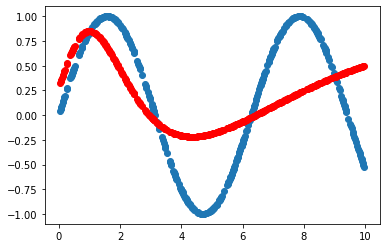

In [56]:
with tf.device('/device:GPU:0'): # ADDED

  model = keras.Sequential()
  model.add(Input(1))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
  model.summary()

  start_time = time.time()
  model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_115 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_116 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.8993215560913086


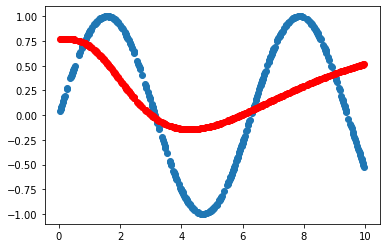

In [57]:
# with tf.device('/GPU:0'):
with tf.device('/CPU:0'):

  model = keras.Sequential()
  model.add(Input(1))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
  model.summary()

  start_time = time.time()
  model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

# 웨이트 초기값

Dense() 생성시에 kernel_initializer, bias_initializer로 설정한다.

- 'he_normal'
- 'lecun_normal'

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_118 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.60019302368164
2/2 [==============================] - 0s 7ms/step - loss: 0.1172 - mape: 0.2508
loss= 0.11716842651367188
mape= 0.2508332431316376


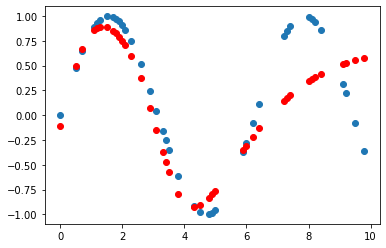

In [58]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()

model.add(Input(1))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(10, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# 노이즈

In [59]:
def train_sin_with_noise(noise_size):

  # x = np.arange(0,10,0.1)
  x = np.arange(0,10,0.001)
  np.random.shuffle(x)
  y = np.sin(x)

  noiseless_y = np.copy(y) # ADD
  y = y + np.random.rand(y.shape[0])*noise_size - noise_size/2.0 # ADD

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]
  test_noiseless_y = noiseless_y[split_index:] # ADD

  model = keras.Sequential()
  model.add(Input(1))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
  model.summary()


  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=100)
  print("elapsed : {}".format(time.time() - start_time))    


  loss, mape = model.evaluate(test_x, test_y)
  print("loss=", loss)
  print("mape=", mape)


  y_ = model.predict(test_x)

  # plt.scatter(test_x,test_y)
  plt.scatter(test_x,test_y, s=1)
  plt.scatter(test_x,y_, s=1)
  plt.show()

## 노이즈 없을 때

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_121 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_122 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 142.24532437324524
125/125 [==============================] - 0s 2ms/step - loss: 1.8916e-05 - mape: 0.0036
loss= 1.891567990242038e-05
mape= 0.0035957011859863997


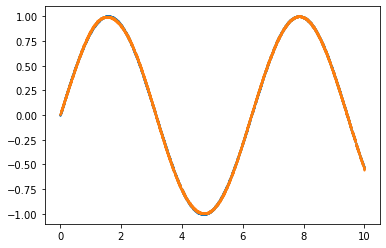

In [60]:
train_sin_with_noise(0.0)

## 노이즈 크기 0.1

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_124 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 90.4309983253479
125/125 [==============================] - 0s 2ms/step - loss: 0.0019 - mape: 0.0340
loss= 0.0018503039609640837
mape= 0.03401053696870804


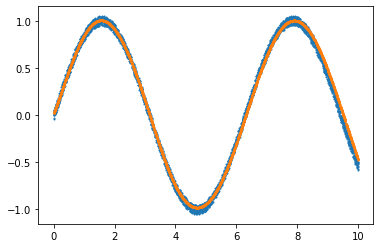

In [61]:
train_sin_with_noise(0.1)

## 노이즈 크기 0.5

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_127 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_128 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 142.24938702583313
125/125 [==============================] - 0s 2ms/step - loss: 0.0213 - mape: 0.1250
loss= 0.021270329132676125
mape= 0.12504099309444427


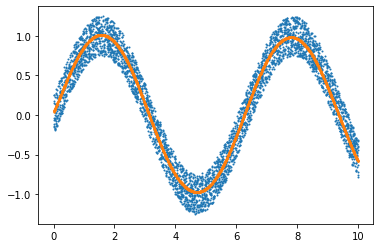

In [62]:
train_sin_with_noise(0.5)

## 노이즈 크기 1.0

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_130 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_131 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 142.24473404884338
125/125 [==============================] - 0s 2ms/step - loss: 0.0850 - mape: 0.2519
loss= 0.08497707545757294
mape= 0.25185179710388184


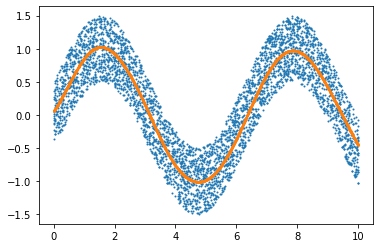

In [63]:
train_sin_with_noise(1.0)

## 노이즈 크기 10.0

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_133 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_134 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 90.82506561279297
125/125 [==============================] - 0s 2ms/step - loss: 8.4240 - mape: 2.5130
loss= 8.42404556274414
mape= 2.513035297393799


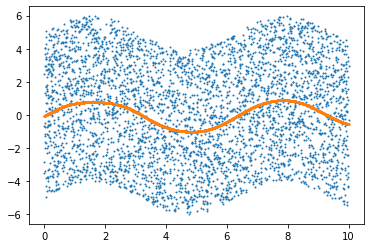

In [64]:
train_sin_with_noise(10.0)

## 노이즈 피쳐
노이즈 입력을 하나 더 준다.

In [67]:
x = np.arange(0,10,1.0)
np.random.shuffle(x)

y = np.zeros((x.shape[0],2))
y[:,0] = np.sin(x)
y[:,1] = np.random.rand(x.shape[0])


Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_140 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_141 (Dense)            (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3958 - mape: 0.5514
Epoch 2/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3383 - mape: 0.5095
Epoch 3/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2934 - mape: 0.4699
Epoch 4/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2551 - mape: 0.43

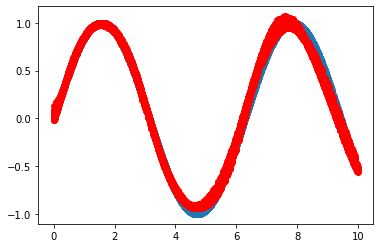

In [68]:
# x = np.arange(0,10,0.001)
x = np.zeros((10000,2))
x[:,0] = np.arange(0,10,0.001) # ADD
x[:,1] = np.random.rand(x.shape[0]) # ADD
np.random.shuffle(x)

# y = np.sin(x)
y = np.sin(x[:,0])

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

model = keras.Sequential()
model.add(Input(2))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)


y_ = model.predict(test_x)

plt.scatter(test_x[:,0],test_y)
plt.scatter(test_x[:,0],y_,color='r')
plt.show()

# 학습 되지 않는 랜덤 함수

랜덤 한수의 경우 x와 y의 간에 관계가 없다.

입출력 간에 관계가 없는 함수로 학습되지 않는다.

60


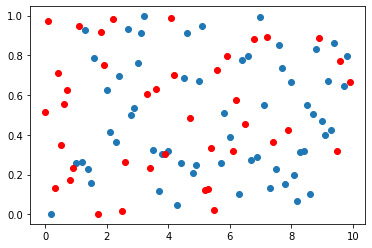

In [84]:
x = np.arange(0,10,0.1)
np.random.shuffle(x)
# y = np.sin(x)
y = np.random.random_sample(x.shape[0])

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]


plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_172 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_173 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_174 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 7.311088800430298
2/2 [==============================] - 0s 10ms/step - loss: 0.1241 - mape: 0.2934
loss= 0.12406589835882187
mape= 0.29344886541366577


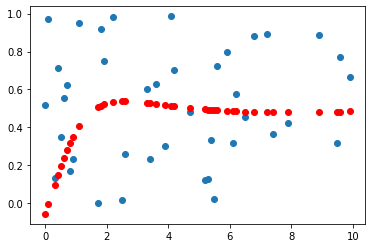

In [85]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


# 모델 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()


# 학습
start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


# 평가
loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)


# 예측
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# Optimizer

```
# SGD
model.compile(optimizer="SGD", ...)
model.compile(optimizer=SGD(learning_rate=0.01), ...)

# Adam
model.compile(optimizer="Adam", ...)
model.compile(optimizer=Adam(learning_rate=0.001), ...)

# Adagrad
model.compile(optimizer="Adagrad", ...)
model.compile(optimizer=Adagrad(learning_rate=0.001), ...)

# RMSProp
model.compile(optimizer="RMSprop", ...)
model.compile(optimizer=RMSprop(learning_rate=0.001), ...)
```

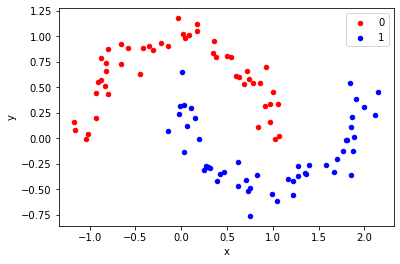

In [70]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from pandas import DataFrame
import matplotlib.pyplot as plt

x, y = make_moons(n_samples=100, noise=0.1, random_state=1)

df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

split_index = int(len(x)*0.7)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]


## SGD

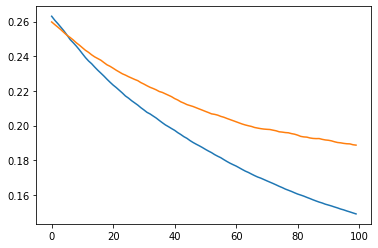

In [71]:
optimizer = "SGD"


model = Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mape"])

model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.show() 

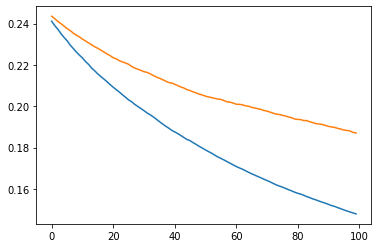

In [72]:
from tensorflow.keras.optimizers import SGD

# optimizer = "SGD"
optimizer = SGD(learning_rate=0.01)


model = Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mape"])

model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.show() 

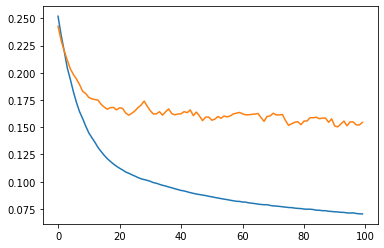

In [73]:
from tensorflow.keras.optimizers import SGD

# optimizer = "SGD"
optimizer = SGD(learning_rate=0.01*10)


model = Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mape"])

model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.show() 

## Adam

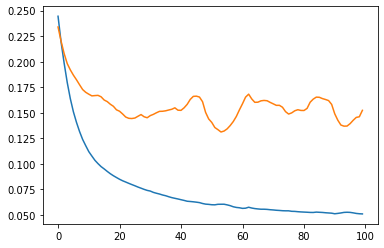

In [74]:
optimizer = "Adam"


model = Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mape"])

model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.show() 

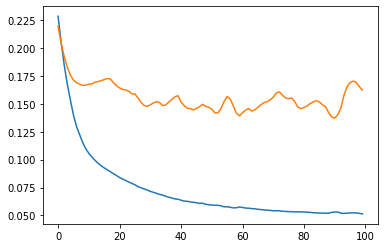

In [75]:
from tensorflow.keras.optimizers import Adam

# optimizer = "Adam"
optimizer = Adam(learning_rate=0.001)



model = Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mape"])

model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.show() 

## Adagrad

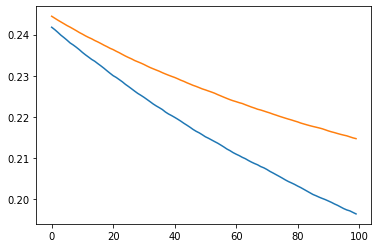

In [76]:
optimizer = "Adagrad"



model = Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mape"])

model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.show() 

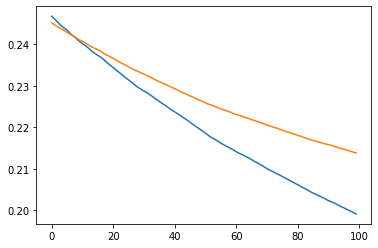

In [77]:
from tensorflow.keras.optimizers import Adagrad

# optimizer = "Adagrad"
optimizer = Adagrad(learning_rate=0.001)



model = Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mape"])

model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.show() 

## RMSprop

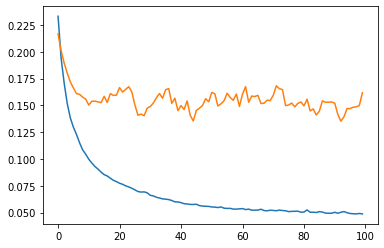

In [78]:
optimizer = "RMSprop"



model = Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mape"])

model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.show() 

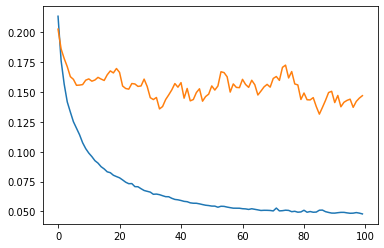

In [79]:
from tensorflow.keras.optimizers import RMSprop

# optimizer = "RMSprop"
optimizer = RMSprop(learning_rate=0.001)



model = Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mape"])

model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.show() 

# 다양한 입출력

## 2개의 입력, 1개의 출력

x1 + x2 -> y의 함수를 학습

x1과 x2는 0~1의 범위를 갖는다.


Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_160 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_161 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_162 (Dense)            (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
elapsed : 41.282530069351196
2/2 [==============================] - 0s 8ms/step - loss: 6.9150e-04 - mape: 0.0200
loss= 0.0006914989207871258
mape= 0.020027877762913704


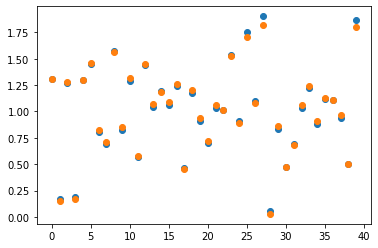

In [80]:
x = np.ones((100,2))
x[:,0] = np.random.rand(100)
x[:,1] = np.random.rand(100)
y = np.sum(x, axis=1)


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


model = keras.Sequential()
# model.add(Input(1))
model.add(Input(2))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*5, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)
              
y_ = model.predict(test_x)

plt.plot(test_y, 'o')
plt.plot(y_, 'o')
plt.show()

## 1개의 입력, 2개의 출력

다음과 같이 y는 2개의 값을 갖고, y1 = x*2, y2=x/2인 함수를 학습

```
y1 = x*2.0
y2 = x/2.0
```


Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_163 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_164 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_165 (Dense)            (None, 2)                 22        
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________
elapsed : 7.424136161804199
2/2 [==============================] - 0s 7ms/step - loss: 6.2886e-04 - mape: 0.0189
loss= 0.0006288571166805923
mape= 0.018892202526330948


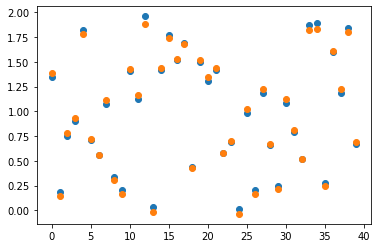

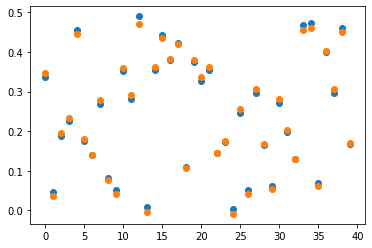

In [81]:
x = np.random.rand(100)
y = np.zeros((100,2))
y[:,0] = x*2.0
y[:,1] = x/2.0


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)
              
y_ = model.predict(test_x)

plt.plot(test_y[:,0], 'o')
plt.plot(y_[:,0], 'o')
plt.show()

plt.plot(test_y[:,1], 'o')
plt.plot(y_[:,1], 'o')
plt.show()


## 2개의 입력, 2개의 출력

x1 + x2 -> z, 

y1 = z*2, y2=z/2인 함수를 학습

x1과 x2는 0~1의 범위를 갖는다.

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_167 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_168 (Dense)            (None, 2)                 22        
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.544220209121704
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - mape: 0.0305
loss= 0.0018464606255292892
mape= 0.03049878403544426


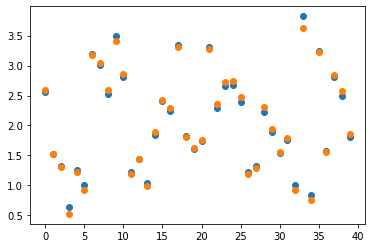

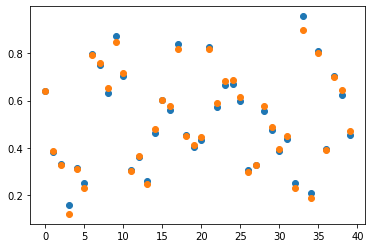

In [82]:
x = np.ones((100,2))
x[:,0] = np.random.rand(100)
x[:,1] = np.random.rand(100)

z = np.sum(x, axis=1)

y = np.zeros((100,2))
y[:,0] = z*2.0
y[:,1] = z/2.0


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Input(1))
model.add(Input(2))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)
              
y_ = model.predict(test_x)

plt.plot(test_y[:,0], 'o')
plt.plot(y_[:,0], 'o')
plt.show()

plt.plot(test_y[:,1], 'o')
plt.plot(y_[:,1], 'o')
plt.show()

